In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import log, sqrt, pi, exp
import scipy
from scipy.stats import norm

In [56]:
class option:
    def __init__(self,type,spot,strike,sigma,r,q,maturity) -> None:
        self.type = type
        self.strike = strike
        self.spot = spot
        self.sigma = sigma
        self.r = r
        self.q = q
        self.maturity = maturity
        self.payoff = 0
        self._d1 = 0
        self._d2 = 0
    
    def simulate(self,X=np.arange(50,200)):
        if self.type == 'C':
            self.payoff = np.array([max(S - self.strike,0) for S in X])
        elif self.type == 'P':
            self.payoff = np.array([max(self.strike - S,0) for S in X])
    def payoff_plot(self):
        plt.plot(self.payoff)
        plt.show()
    def d1(self,S):
        self._d1 = (np.log(S/self.strike)+(self.r+(self.sigma**2)/2)*self.maturity)/(self.sigma*np.sqrt(self.maturity))
        return self._d1
    def get_d1(self):
        return self._d1
    def d2(self,S):
        self._d2 = option.d1(self,S) - self.sigma*np.sqrt(self.maturity)
        return self._d2
    def get_d2(self):
        return self._d2
    
    
    
    def delta(self,S):
        if self.type == 'C':
            if type(S) == list or type(S) == np.array:
                return np.array([norm.cdf(option.d1(self,X)) for X in S])
            else:
                return norm.cdf(option.d1(self,S))
        elif self.type == 'P':
            if type(S) == list or type(S) == np.array:
                return np.array([-norm.cdf(-option.d1(self,X)) for X in S])
            else:
                return -norm.cdf(-option.d1(self,S))
    def gamma(self,S):
        if self.type == 'C':
            if type(S) == list or type(S) == np.array:
                return np.array([norm.pdf(option.d1(self,X))/(X*self.sigma*sqrt(self.maturity)) for X in S])
            else:
                return norm.pdf(option.d1(self,S))/(S*self.sigma*sqrt(self.maturity))
        elif self.type == 'P':
            if type(S) == list or type(S) == np.array:
                return np.array([norm.pdf(option.d1(self,X))/(X*self.sigma*sqrt(self.maturity)) for X in S])
            else:
                return norm.pdf(option.d1(self,S))/(S*self.sigma*sqrt(self.maturity))
    def vega(self,S):
        if self.type == 'C':
            if type(S) == list or type(S) == np.array:
                return np.array([0.01*(X*norm.pdf(option.d1(self,X))*sqrt(self.maturity)) for X in S])
            else:
                return 0.01*(S*norm.pdf(option.d1(self,S))*sqrt(self.maturity))
        elif self.type == 'P':
            if type(S) == list or type(S) == np.array:
                return np.array([0.01*(X*norm.pdf(option.d1(self,X))*sqrt(self.maturity)) for X in S])
            else:
                return 0.01*(S*norm.pdf(option.d1(self,S))*sqrt(self.maturity))
    def theta(self,S):
        if self.type == 'C':
            if type(S) == list or type(S) == np.array:
                return np.array([0.01*(-(X*norm.pdf(option.d1(self,X))*self.sigma)/(2*sqrt(self.maturity)) - self.r*self.strike*exp(-self.r*self.maturity)*norm.cdf(option.d2(self,X))) for X in S])
            else:
                return 0.01*(-(S*norm.pdf(option.d1(self,S))*self.sigma)/(2*sqrt(self.maturity)) - self.r*self.strike*exp(-self.r*self.maturity)*norm.cdf(option.d2(self,S)))
        elif self.type == 'P':
            if type(S) == list or type(S) == np.array:
                return np.array([0.01*(-(X*norm.pdf(option.d1(self,X))*self.sigma)/(2*sqrt(self.maturity)) + self.r*self.strike*exp(-self.r*self.maturity)*norm.cdf(-option.d2(self,X))) for X in S])
            else:
                return 0.01*(-(S*norm.pdf(option.d1(self,S))*self.sigma)/(2*sqrt(self.maturity)) + self.r*self.strike*exp(-self.r*self.maturity)*norm.cdf(-option.d2(self,S)))
    def rho(self,S):
        if self.type == 'C':
            if type(S) == list or type(S) == np.array:
                return np.array([0.01*(self.strike*self.maturity*exp(-self.r*self.maturity)*norm.cdf(option.d2(self,X))) for X in S])
            else:
                return 0.01*(self.strike*self.maturity*exp(-self.r*self.maturity)*norm.cdf(option.d2(self,S)))
        elif self.type == 'P':
            if type(S) == list or type(S) == np.array:
                return np.array([0.01*(-self.strike*self.maturity*exp(-self.r*self.maturity)*norm.cdf(-option.d2(self,X))) for X in S])
            else:
                return 0.01*(-self.strike*self.maturity*exp(-self.r*self.maturity)*norm.cdf(-option.d2(self,S)))
    
    ###################################################" PLOTS "##############################################################
    def delta_plot(self,S:list):
        plt.plot(np.array([option.delta(self,X) for X in S]))
        plt.show()

    def gamma_plot(self,S:list):
        plt.plot(np.array([option.gamma(self,X) for X in S]))
        plt.show()
    
    def vega_plot(self,S:list):
        plt.plot(np.array([option.vega(self,X) for X in S]))
        plt.show()
    
    def theta_plot(self,S:list):
        plt.plot(np.array([option.theta(self,X) for X in S]))
        plt.show()

            
    

In [77]:
class portfolio:
    def __init__(self,option:option,qtity,period=np.arange(50,200)) -> None:
        option.simulate(period)
        self.last_option = option
        self.payoff = option.payoff
        self.maturity = option.maturity
        self.sigma = option.sigma
        self.r = option.r
        self.q = option.q
        self.qtity = qtity
        self.period = period
        self.record = []
    
    def add(self,other:option,qtity,corr=0):
        other.simulate(self.period)
        self.payoff = self.qtity * self.payoff + qtity * other.payoff
        if self.maturity != other.maturity:
            self.maturity = min(self.maturity,other.maturity)
            print("maturity changed to the shortest")
        
        if self.sigma != other.sigma:
            self.sigma = self.qtity**2 * self.sigma + qtity**2 * other.sigma + 2 * self.qtity* qtity * self.sigma * other.sigma * corr
            print("maturity changed to the shortest")
        
        if self.r != other.r or self.q != other.q:
            print("non corresponding inputs for r and q")
            raise ValueError
        self.record.append([other,qtity])
    
    def portfolio_plot(self):
        plt.plot(self.payoff)
        plt.show()
    
    def delta(self):
        pass

In [78]:
C = option("C",100,100,0.16,0.01,0,1)
P = option("P",100,100,0.16,0.01,0,1)
port = portfolio(C,1,np.arange(50, 150))

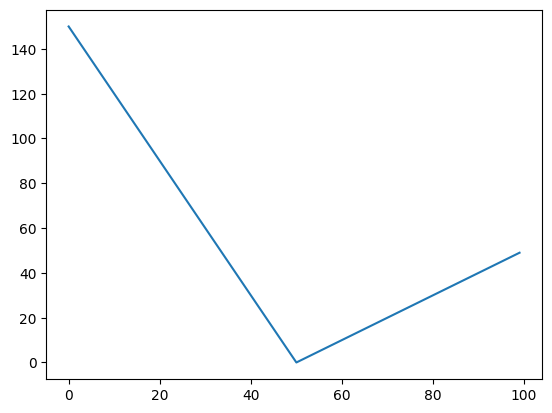

In [80]:
port.add(C,-2)
port.portfolio_plot()

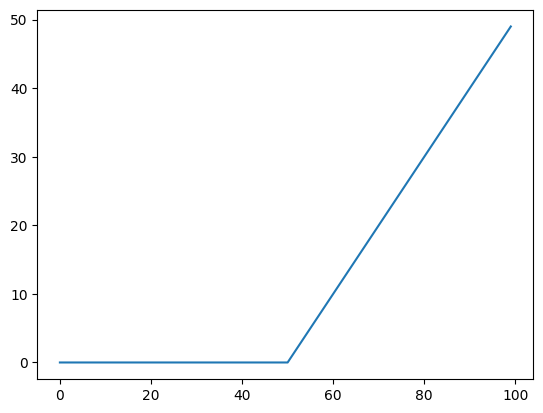

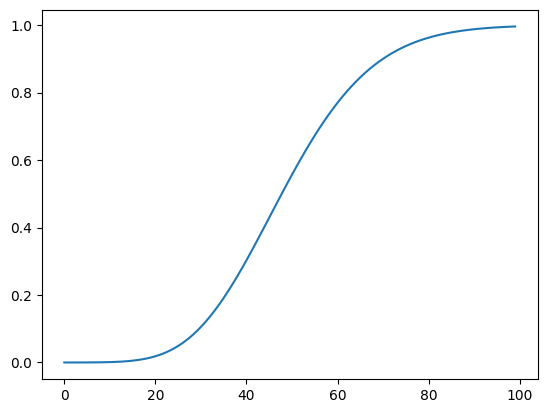

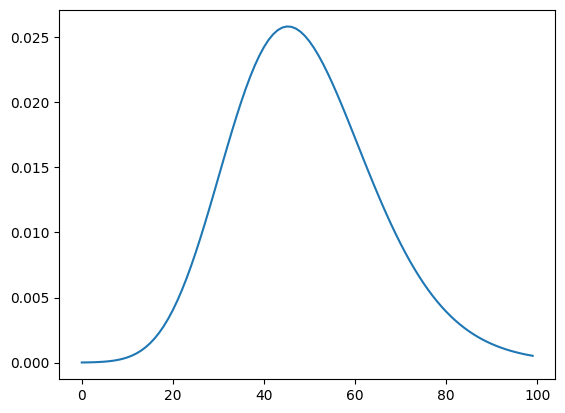

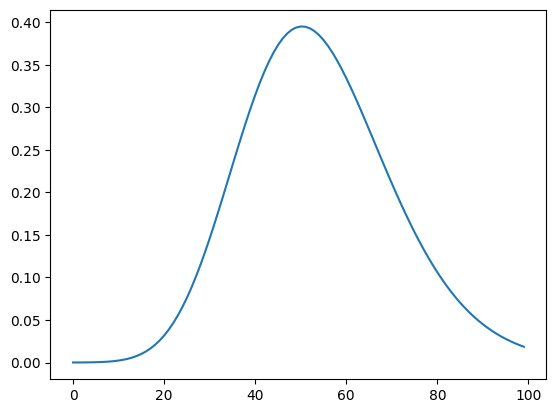

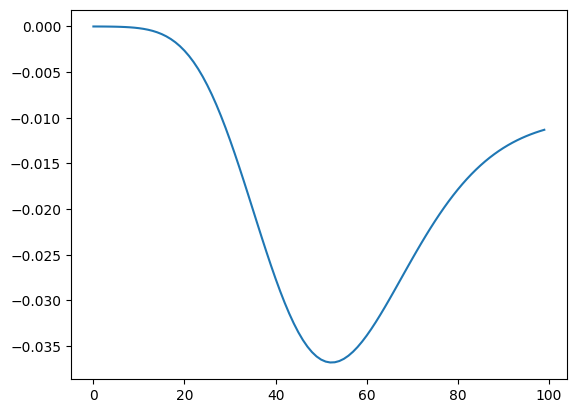

In [43]:
test.simulate(np.arange(0.5*test.strike,1.5*test.strike))
test.delta_plot([s for s in np.arange(0.5*test.strike,1.5*test.strike)])
test.gamma_plot([s for s in np.arange(0.5*test.strike,1.5*test.strike)])
test.vega_plot([s for s in np.arange(0.5*test.strike,1.5*test.strike)])
test.theta_plot([s for s in np.arange(0.5*test.strike,1.5*test.strike)])


In [ ]:
for S in np.arange(0.5*100,1.5*100):
    print((S*100))